Inspiration

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('Data file1.csv')

In [3]:
#we are explicitly putting df into DataFrame, so that we can utilise all the functionalities of dataframe.
df=pd.DataFrame(data=df)

In [4]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [5]:
#pd.set_option('display.max_rows', None)

In [6]:
df.shape

(209593, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
#lets check the statistical summary

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['pcircle']=le.fit_transform(df['pcircle'])

In [11]:
df['msisdn']=le.fit_transform(df['msisdn'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [13]:
#we are spliting pdate column for performing further operations.


df["pdate"]=pd.to_datetime(df["pdate"])

In [14]:
df["Year"]=df["pdate"].dt.year
df["Month"]=df["pdate"].dt.month

In [15]:
#lets drop pdate column

df.drop('pdate',axis=1,inplace=True)

In [16]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016,7
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016,10
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016,8
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,0.0,2.0,12,6,0.0,1.000000,1.000000,0,2016,6
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,0.0,3.0,18,6,0.0,1.000000,1.000000,0,2016,12
209590,1,53995,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,0.0,6.0,54,12,0.0,4.000000,3.833333,0,2016,7
209591,1,111388,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,0.0,3.0,24,12,0.0,0.000000,10.500000,0,2016,7


In [17]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.0,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,0.0,2016.0,6.612253
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.0,2.371940
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2016.0,1.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,2016.0,6.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,0.0,2016.0,7.000000
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,0.0,2016.0,8.000000
max,1.000000,186242.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,0.0,2016.0,12.000000


<AxesSubplot:>

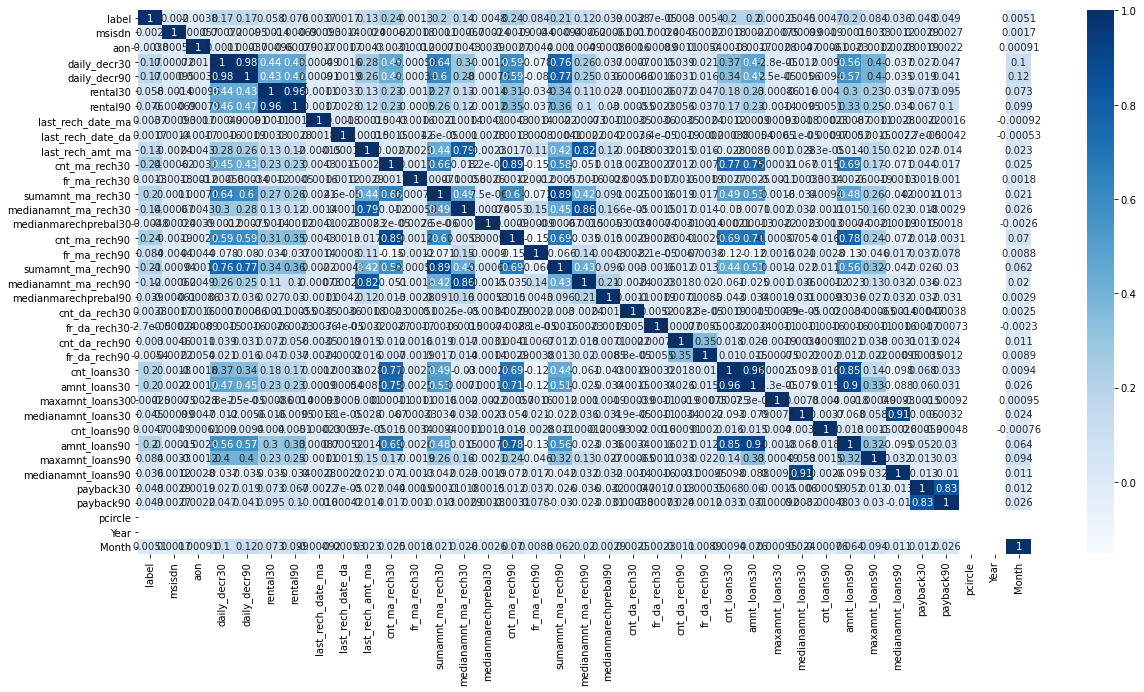

In [18]:
#lets check correlation matrix

fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

<AxesSubplot:xlabel='label', ylabel='count'>

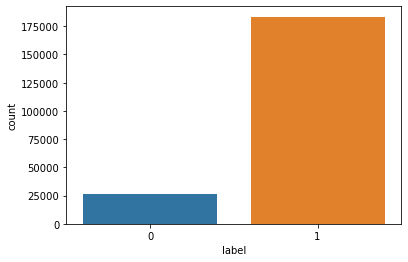

In [19]:
#lets check success and failure count

sns.countplot(x="label",data=df)


In [20]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [21]:
#lets calculate the zscore to remove outliers

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr > 3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [22]:
zscr[209587][27]

4.33856016931461

In [23]:
zscr[21][16]

4.4703916213001245

In [24]:
zscr[22][33]

3.6552396504846874

In [25]:
#lets check the presence of outliers

print("shape before removing outliers:",df.shape)


dfnew=df[(zscr<3).all(axis=1)]

print("shape after removing outliers:",dfnew.shape)

shape before removing outliers: (209593, 37)
shape after removing outliers: (0, 37)


In [26]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.0,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,0.0,2016.0,6.612253
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.0,2.371940
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2016.0,1.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,2016.0,6.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,0.0,2016.0,7.000000
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,0.0,2016.0,8.000000
max,1.000000,186242.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,0.0,2016.0,12.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2078a18bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x20789dd0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2078a18b7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x20789dd0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x20789dd0c70>],
 'means': []}

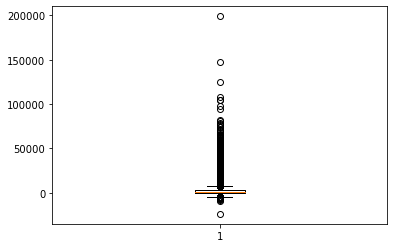

In [27]:
plt.boxplot(df['rental30'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20789e202e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20789e209a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20789e13f40>],
 'medians': [<matplotlib.lines.Line2D at 0x20789e2c0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20789e2c400>],
 'means': []}

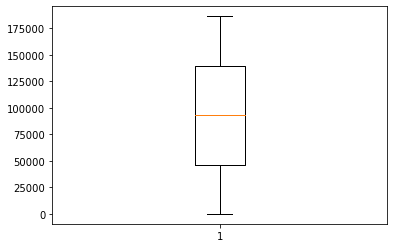

In [28]:
plt.boxplot(df['msisdn'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20787830040>,
 'caps': [<matplotlib.lines.Line2D at 0x207879e8b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x20787806a60>],
 'medians': [<matplotlib.lines.Line2D at 0x20787a2e700>],
 'fliers': [<matplotlib.lines.Line2D at 0x20787a4bca0>],
 'means': []}

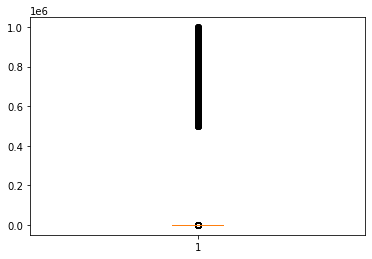

In [29]:
plt.boxplot(df['last_rech_date_ma'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2078a0e71c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2078a0e78b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2078a0d7b80>],
 'medians': [<matplotlib.lines.Line2D at 0x2078a0e7fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2078a0eaca0>],
 'means': []}

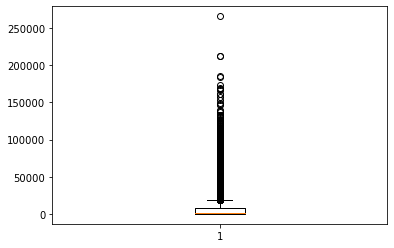

In [30]:
plt.boxplot(df['daily_decr30'])

In [31]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'Year', 'Month'],
      dtype='object')

In [32]:
df['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755200
Name: aon, dtype: float64

In [33]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [34]:
df1=df.copy()

In [35]:
df1

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016,7
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016,10
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016,8
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,0.0,2.0,12,6,0.0,1.000000,1.000000,0,2016,6
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,0.0,3.0,18,6,0.0,1.000000,1.000000,0,2016,12
209590,1,53995,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,0.0,6.0,54,12,0.0,4.000000,3.833333,0,2016,7
209591,1,111388,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,0.0,3.0,24,12,0.0,0.000000,10.500000,0,2016,7


In [36]:
###lets split it into X and Y

X=df1.iloc[:,1:37]
Y=df.loc[:,'label']

In [37]:
X

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month
0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016,7
1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016,10
2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016,8
3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016,6
4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,0,2016,6
209589,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,0,2016,12
209590,53995,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,0,2016,7
209591,111388,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,0,2016,7


In [38]:
Y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [39]:
#bring all the data to a common scale

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(X,columns=X.columns)
x

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month
0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016,7
1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016,10
2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016,8
3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016,6
4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,0,2016,6
209589,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,0,2016,12
209590,53995,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,0,2016,7
209591,111388,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,0,2016,7


In [40]:
x.shape

(209593, 36)

In [41]:
Y.shape

(209593,)

In [42]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=.22,random_state=43)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(163482, 36)
(46111, 36)
(163482,)
(46111,)


In [44]:
gnb=GaussianNB()
gnb.fit(x_train,Y_train)
predg=gnb.predict(x_test)
print('accuracy score:',)
print(accuracy_score(Y_test,predg))
print(confusion_matrix(Y_test,predg))
print(classification_report(Y_test,predg))

accuracy score:
0.5451410726290906
[[ 5143   598]
 [20376 19994]]
              precision    recall  f1-score   support

           0       0.20      0.90      0.33      5741
           1       0.97      0.50      0.66     40370

    accuracy                           0.55     46111
   macro avg       0.59      0.70      0.49     46111
weighted avg       0.88      0.55      0.62     46111



In [45]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,Y_train)
preddtc=dtc.predict(x_test)
print('accuracy score:',)
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

accuracy score:
0.8708984840927327
[[ 2951  2790]
 [ 3163 37207]]
              precision    recall  f1-score   support

           0       0.48      0.51      0.50      5741
           1       0.93      0.92      0.93     40370

    accuracy                           0.87     46111
   macro avg       0.71      0.72      0.71     46111
weighted avg       0.87      0.87      0.87     46111



In [46]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,Y_train)
predrf=rf.predict(x_test)
print('accuracy score:',)
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

accuracy score:
0.9166576305003145
[[ 2681  3060]
 [  783 39587]]
              precision    recall  f1-score   support

           0       0.77      0.47      0.58      5741
           1       0.93      0.98      0.95     40370

    accuracy                           0.92     46111
   macro avg       0.85      0.72      0.77     46111
weighted avg       0.91      0.92      0.91     46111



In [47]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,Y_train)
predad=ad.predict(x_test)
print('accuracy score:',)
print(accuracy_score(Y_test,predad))
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))


accuracy score:
0.9039708529418143
[[ 1805  3936]
 [  492 39878]]
              precision    recall  f1-score   support

           0       0.79      0.31      0.45      5741
           1       0.91      0.99      0.95     40370

    accuracy                           0.90     46111
   macro avg       0.85      0.65      0.70     46111
weighted avg       0.89      0.90      0.89     46111



#here we performed GaussianNB, RandomForestClassifier and AdaboostClassifier as they are not sesitive to outliers. 

In [48]:
#lets check cross validation score

score=cross_val_score(gnb,x,Y,cv=5)
print(score)
print(score.mean())

[0.5449796  0.5482001  0.54528973 0.54730665 0.55143375]
0.5474419654113787


In [49]:
score=cross_val_score(ad,x,Y,cv=5)
print(score)
print(score.mean())

[0.90460173 0.90484029 0.90505499 0.90445632 0.90543442]
0.9048775490385699


In [50]:
score=cross_val_score(dtc,x,Y,cv=5)
print(score)
print(score.mean())

[0.86874687 0.86762566 0.87225363 0.87449306 0.87296627]
0.8712170970649364


In [51]:
lg=LogisticRegression()
lg.fit(x_train,Y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(Y_test,pred))
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

accuracy score:
0.8755611459304721
              precision    recall  f1-score   support

           0       0.53      0.00      0.01      5741
           1       0.88      1.00      0.93     40370

    accuracy                           0.88     46111
   macro avg       0.70      0.50      0.47     46111
weighted avg       0.83      0.88      0.82     46111

[[   28  5713]
 [   25 40345]]


In [52]:
score=cross_val_score(lg,x,Y,cv=5)
print(score)
print(score.mean())

[0.87521172 0.87537871 0.87535485 0.87513717 0.87518488]
0.8752534665524336


In [53]:
#Hyper Parameter Tuning to improve results

from sklearn.model_selection import GridSearchCV

grid_param={'criterion':['gini','entropy']}

gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',cv=5)
gd_sr.fit(x,Y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'entropy'}
0.8743517314679303


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,Y_train)
p=dt.predict(x_test)
print(accuracy_score(Y_test,p))

0.8705731821040532


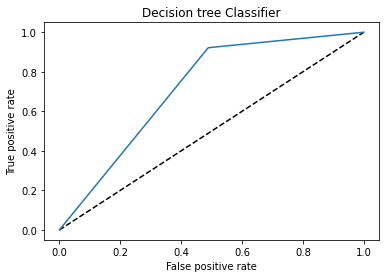

In [55]:
#Decision Tree Curve
Y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision tree Classifier')
plt.show()

In [56]:
auc_score=roc_auc_score(Y_test,dt.predict(x_test))
print(auc_score)

0.716380036223891


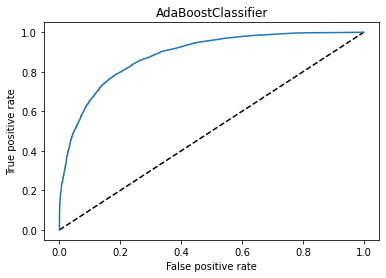

In [57]:
#AdaBoostClassifier Curve
Y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Adaboost classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

In [58]:
auc_score=roc_auc_score(Y_test,ad.predict(x_test))
print(auc_score)

0.6511089440615433


In [59]:
#lets save the best result

import joblib

joblib.dump(ad,"admodel.obj")

['admodel.obj']

In [60]:
adfile=joblib.load("admodel.obj")
adfile.predict(x_train)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)